In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

import time


#For train-test split
from sklearn.model_selection import train_test_split

#for Random forest algorithm
from sklearn.ensemble import RandomForestClassifier

#for GridSearchCV and RandomSearchCv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#for confusion matrix
from sklearn.metrics import confusion_matrix

#for roc-auc curve
from sklearn.metrics import roc_curve, roc_auc_score

#for Classification Report
from sklearn.metrics import classification_report

Fetching dataset

In [2]:
df = pd.read_csv('proc_data_Hr.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,3,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,5,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


Seperating target variable vs independant variable

In [4]:
feature_list = df.columns.to_list()
class_ = 'Attrition'
feature_list.remove(class_)

feature_space = df[feature_list]
class_variable = df[class_]

feature_space.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,3,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,5,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


Train-Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(feature_space, class_variable, test_size=0.2, random_state=42)

Creating model

In [6]:
rf_fit = RandomForestClassifier(random_state=42)

Hyper-Parameters for Random forest model

In [7]:
start = time.time()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Minimum number of samples required to split a node
min_samples_split = [8,10,12,16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [18,10,12,16]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =  ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}

rf_random = RandomizedSearchCV(estimator = rf_fit, param_distributions = random_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)


end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Time taken in grid search:  574.24


In [8]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': None,
 'criterion': 'entropy',
 'bootstrap': True}

Setting this best parameter in random forest tree model

In [9]:
rf_fit = rf_random.best_estimator_

Training the model with optimal parameters

In [10]:
rf_fit.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=800, random_state=42)

Predictions

In [11]:
pred_rf = rf_fit.predict(x_test)

Accuracy

In [12]:
accuracy_rf = rf_fit.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.896


Error Rate

In [13]:
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1037


Knowing variable importance according to model

In [14]:
importances = rf_fit.feature_importances_
indices = np.argsort(importances)[::-1]
print(f'importance: {importances}')
print(f'index: {indices}')

importance: [8.93070576e-02 5.14950894e-02 6.91850288e-02 9.75018687e-03
 1.69357643e-02 4.42267477e-02 4.17955033e-02 1.51251661e-02
 8.74023567e-02 3.48246173e-02 4.56038348e-02 3.96917962e-02
 2.71546180e-02 2.17703682e-02 4.93352815e-02 1.78490104e-02
 1.98112615e-02 6.67094595e-02 2.41151720e-02 6.61138880e-03
 1.05901474e-01 1.22119269e-02 3.59661727e-03 5.36211850e-03
 8.48500308e-03 4.68379327e-03 2.18252044e-03 5.82655433e-03
 5.18476379e-05 4.73153865e-03 4.39871709e-04 4.78515121e-03
 7.15085475e-04 9.43604889e-04 4.08362197e-04 1.03110196e-02
 2.44694953e-02 2.99789217e-03 5.83578535e-03 1.73606286e-02]
index: [20  0  8  2 17  1 14 10  5  6 11  9 12 36 18 13 16 15 39  4  7 21 35  3
 24 19 38 27 23 31 29 25 22 37 26 33 32 30 34 28]


In [15]:
imp_var_names = []
imp_var_val = []

for col in range(0,len(importances)):
    imp_var_names.append(x_train.columns[indices[col]])
    imp_var_val.append(importances[col])

final_var_imp = pd.Series(data = imp_var_val, index= imp_var_names)
final_var_imp = final_var_imp.sort_values(ascending = False)
final_var_imp.columns = ['Var_Name', 'Mean_Impurity_decreased']
print(final_var_imp.columns)

['Var_Name', 'Mean_Impurity_decreased']


<function matplotlib.pyplot.show(close=None, block=None)>

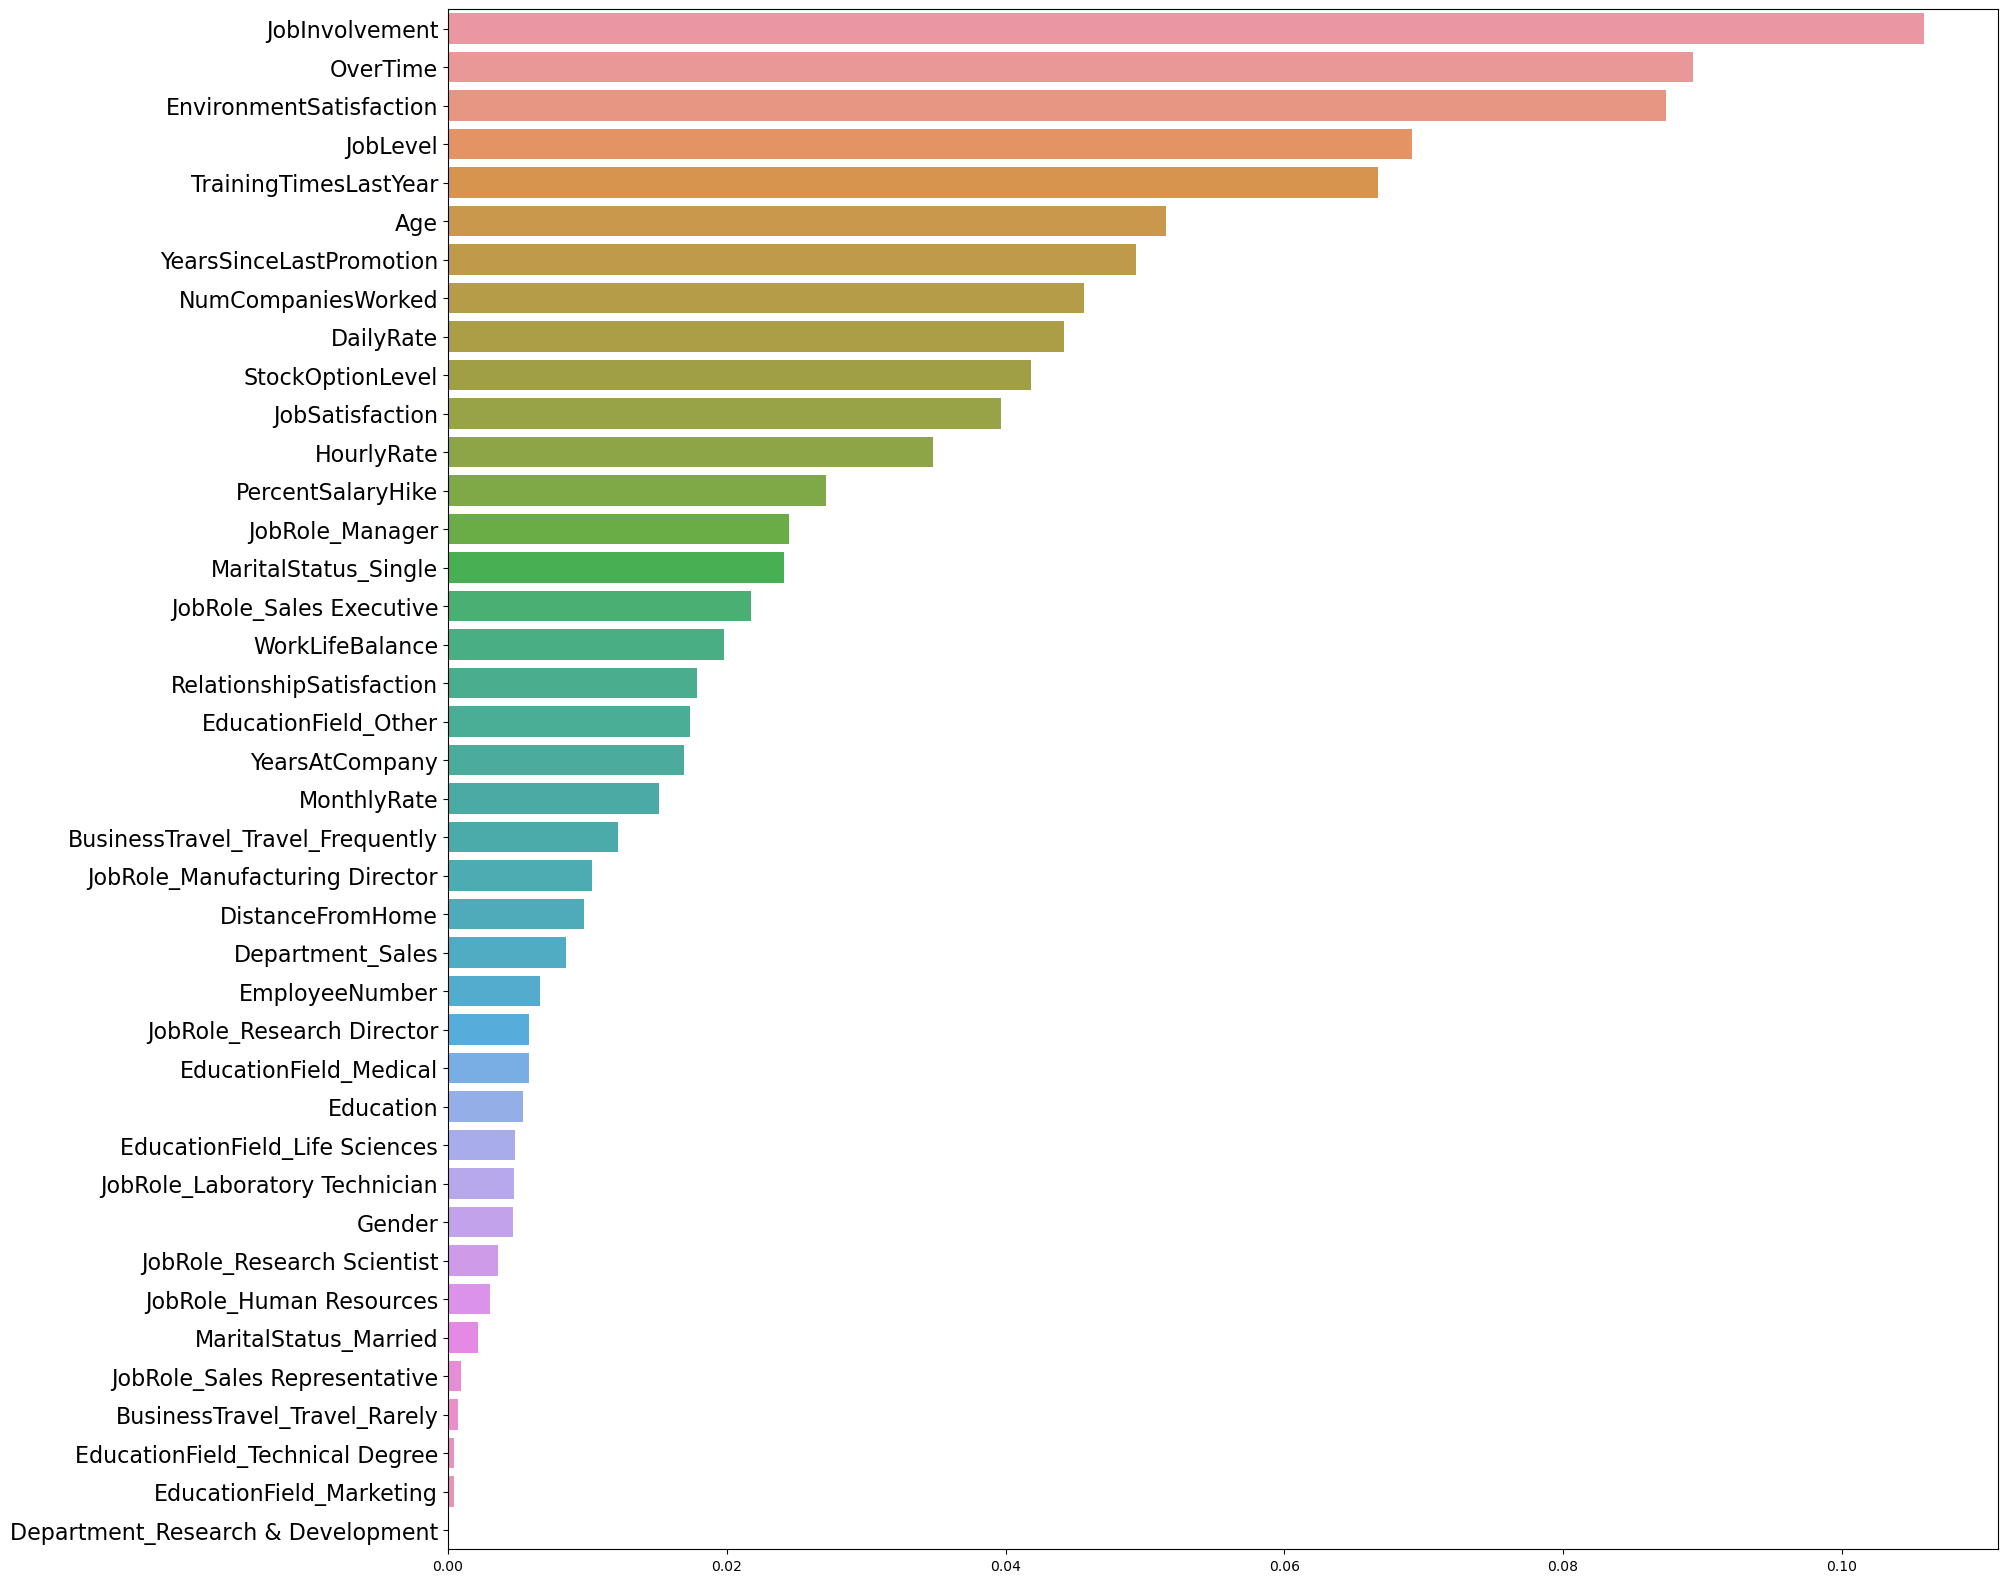

In [16]:
plt.figure(figsize=[20,20])
sns.barplot(y=final_var_imp.index, x= final_var_imp.values, orient = 'h')
plt.yticks(fontsize = 16)
plt.show

Confusion matrix

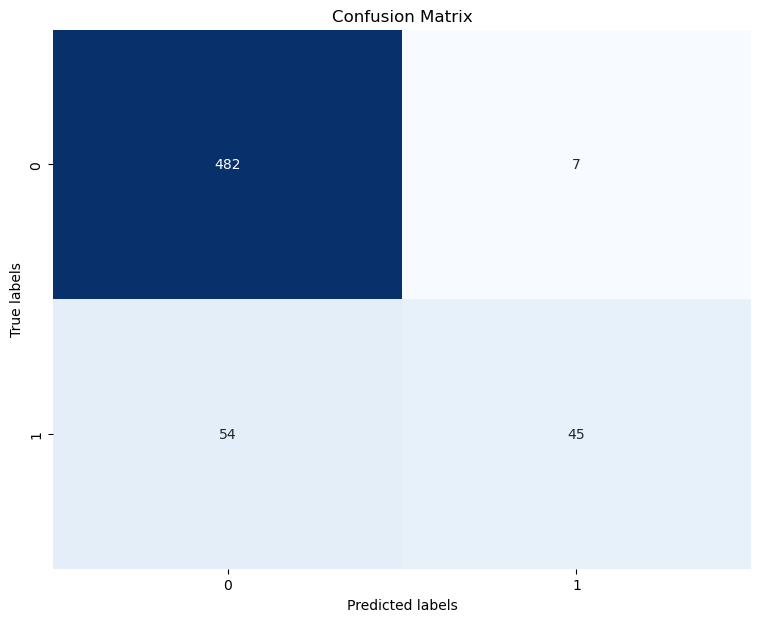

In [17]:
cm = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=[9,7])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar= False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

AUC curve

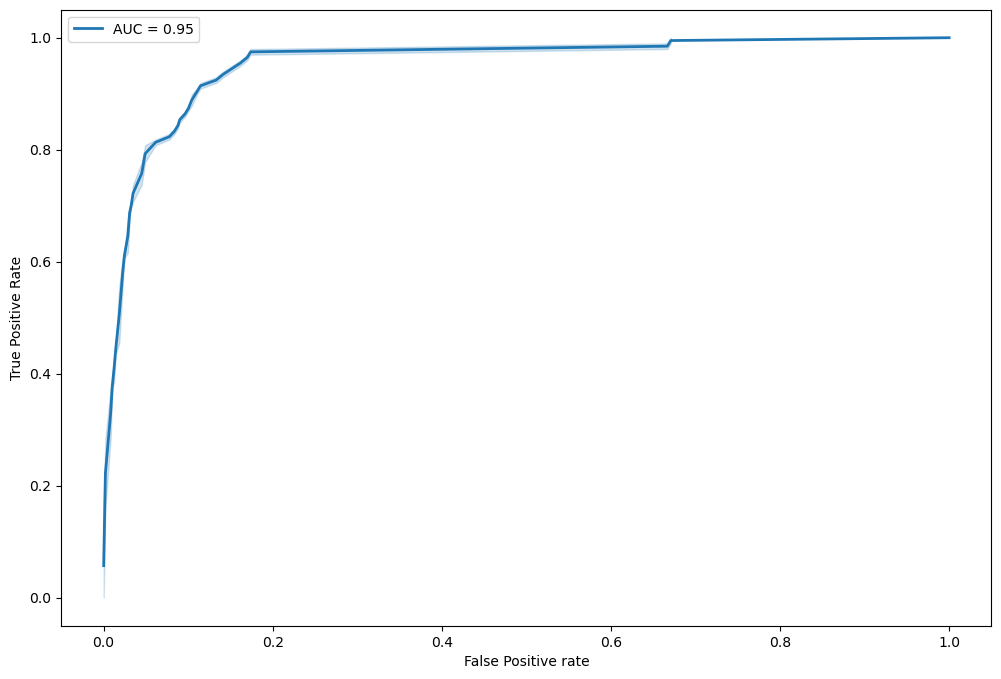

In [18]:
y_pred_rf = rf_fit.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)

auc_score = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=[12,8])
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc_score:.2f}', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive rate')
plt.show()

Classification Report

In [19]:
class_report = classification_report(y_test, pred_rf)

print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       489
           1       0.87      0.45      0.60        99

    accuracy                           0.90       588
   macro avg       0.88      0.72      0.77       588
weighted avg       0.89      0.90      0.88       588



In [20]:
print(rf_fit.score(x_train,y_train))
print(rf_fit.score(x_test,y_test))

0.9268707482993197
0.8962585034013606


Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [79]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty (L1 or L2 regularization)
    'solver': ['liblinear', 'newton-cg','lbfgs','liblinear','sag','saga']  # Optimization algorithm
}

# Instantiate logistic regression model
logreg = LogisticRegression(dual=False, fit_intercept=True,)

In [80]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, n_iter=100, cv=10, scoring='accuracy', random_state=42)

# Perform Randomized Search CV
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [50]:
# Get best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get best model
best_model = random_search.best_estimator_

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}


In [51]:
# Make predictions on the testing data
y_pred = best_model.predict(x_test)

logreg.fit(x_train,y_train)

LogisticRegression()

In [58]:
accuracy_rf = logreg.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

Here is our mean accuracy on the test set:
 0.835
The test error rate for our model is:
  0.1650


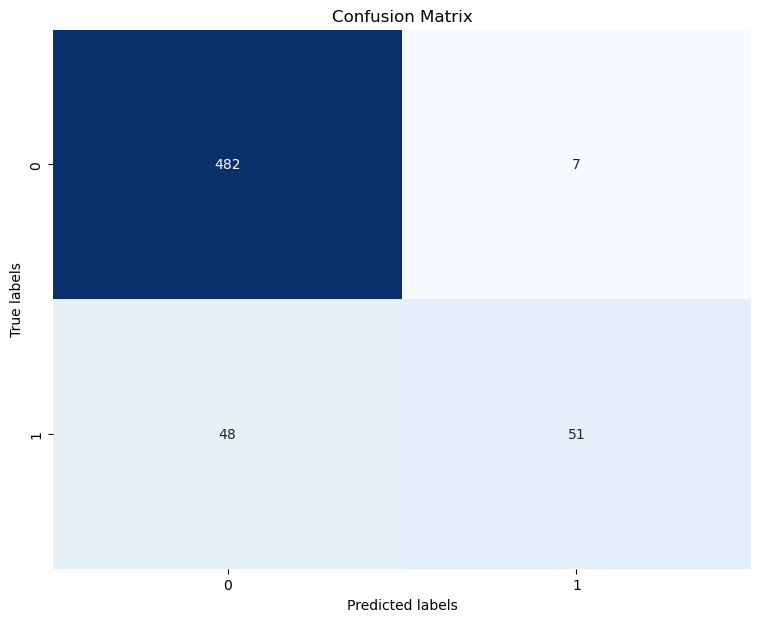

In [59]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[9,7])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar= False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

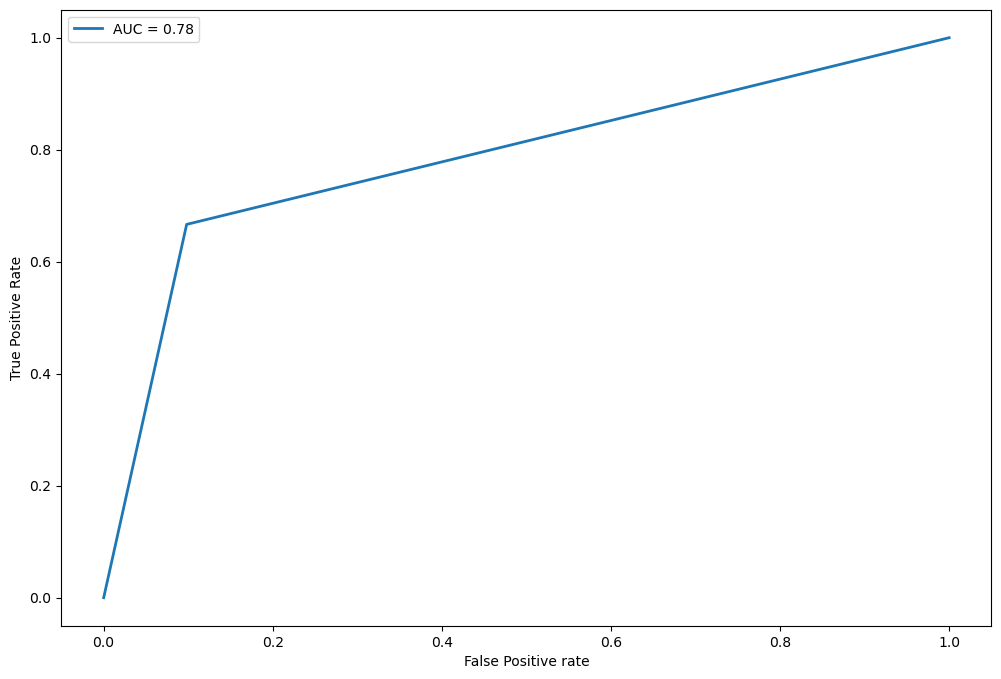

In [78]:
y_pred_rf = logreg.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)

plt.figure(figsize=[12,8])
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc_score:.2f}', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive rate')
plt.show()

In [61]:
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       489
           1       0.88      0.52      0.65        99

    accuracy                           0.91       588
   macro avg       0.89      0.75      0.80       588
weighted avg       0.90      0.91      0.90       588



In [74]:
print(logreg.score(x_train,y_train))
print(logreg.score(x_test,y_test))

0.8401360544217688
0.8350340136054422


Naive Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
# Define hyperparameter grid
param_grid = {
    # You can define hyperparameters for different types of Naive Bayes classifiers if needed
    # For GaussianNB, there are no hyperparameters to tune
}

# Instantiate Naive Bayes model
naive_bayes = GaussianNB()

In [70]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=naive_bayes, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Perform Randomized Search CV
random_search.fit(x_train, y_train)

# Get best hyperparameters (not applicable for Naive Bayes as it has no hyperparameters)
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

# Get best model
best_model = random_search.best_estimator_

In [71]:
# Make predictions on the testing data
y_pred = best_model.predict(x_test)

# Evaluate accuracy
accuracy = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7842535787321063
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       489
           1       0.58      0.67      0.62        99

    accuracy                           0.86       588
   macro avg       0.75      0.78      0.77       588
weighted avg       0.87      0.86      0.87       588



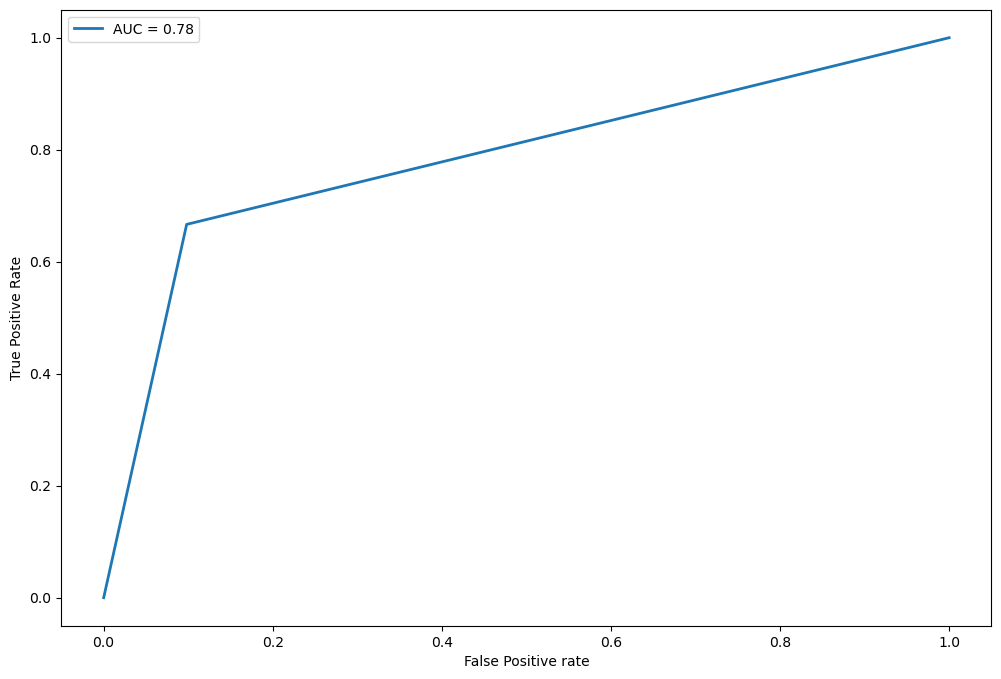

In [76]:
y_pred_rf = best_model.predict_proba(x_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)

plt.figure(figsize=[12,8])
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc_score:.2f}', lw=2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive rate')
plt.show()

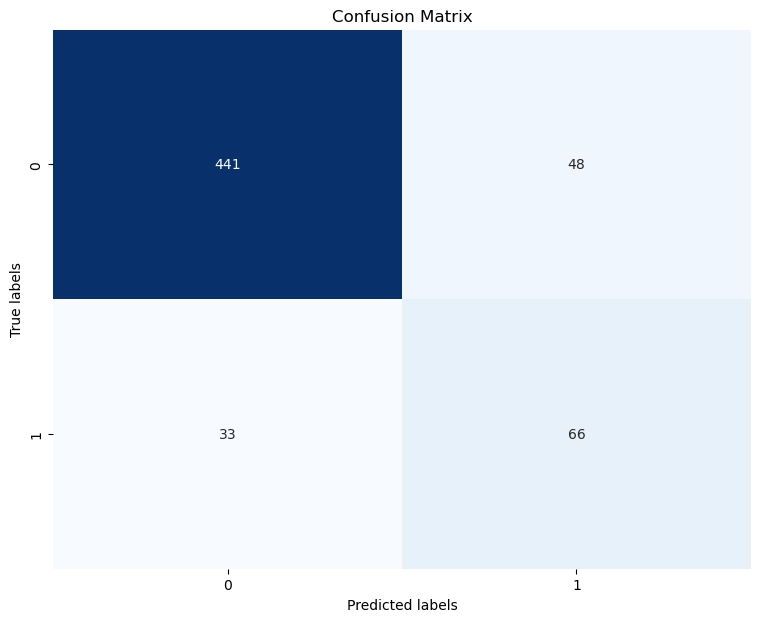

In [73]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[9,7])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar= False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [77]:
print(best_model.score(x_train,y_train))
print(best_model.score(x_test,y_test))

0.8418367346938775
0.8622448979591837
